In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *

In [2]:
%load_ext autoreload
%autoreload 2

# Loading the dataset

In [3]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [4]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [5]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [6]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Normalization

In [7]:
train_dataset.shape

torch.Size([316, 28, 50])

In [8]:
test_dataset.shape

torch.Size([100, 28, 50])

In [9]:
mean=train_dataset.mean(0).view(1,28,50)
std=train_dataset.std(0).view(1,28,50)

In [10]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

In [14]:
class ThreeLayers(nn.Module):
    
    num_my_conv_layers=3
    num_linear_layers=2
    
    def __init__(self,params):
        super(ThreeLayers,self).__init__()
        
        self.params=params
        
        layers=[]
        for i in range(self.num_my_conv_layers): 
            layers+=MyConv1D(*self.params[i]).layers
        
        layers.append(Flatten())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers]))
        layers.append(nn.ReLU())
        
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers+1]))
        
        self.sequential=nn.Sequential(*layers)
        
    def forward(self,x):
        x=self.sequential(x)
        
        return x

In [15]:
class ThreeLayers2D(nn.Module):
    
    num_my_conv_layers=3
    num_linear_layers=2
    
    def __init__(self,params):
        super(ThreeLayers2D,self).__init__()
        
        self.params=params
        
        layers=[]
        layers.append(Tensor4D())
        for i in range(self.num_my_conv_layers): 
            layers+=MyConv2D(*self.params[i]).layers
        layers.append(Flatten())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers]))
        layers.append(nn.ReLU())
        layers.append(nn.Linear(*self.params[self.num_my_conv_layers+1]))
        
        self.sequential=nn.Sequential(*layers)
        
    def forward(self,x):
        x=self.sequential(x)
        
        return x
    

# Training

In [ ]:
?nn.Conv2D

  0%|          | 2/400 [00:00<00:34, 11.69it/s]

Network:

[28, 28, 3, 0.8, True]
[28, 28, 3, 0.8, True]
[28, 28, 3, 0.8, True]
[1232, 200]
[200, 2]

Repetition 0


100%|██████████| 400/400 [00:31<00:00, 12.89it/s]


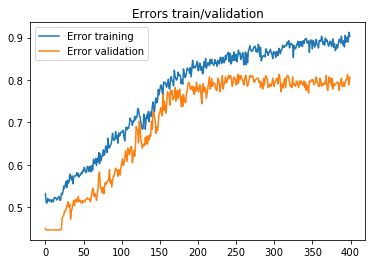

  0%|          | 2/400 [00:00<00:29, 13.63it/s]

Performance train: 0.884071729958
Performance validation: 0.793037974684
Repetition 1


  2%|▏         | 6/400 [00:00<00:28, 13.81it/s]

In [ ]:
cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                             linear_filters=[200,2],
                             dropout_rate=0.8,batch_norm=True,conv1D=True)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=400,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params,cross_validation=True,repetitions_test=0)

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)